## Introduction
In this guided project, we'll extend the work we did in the last two missions on visualizing the gender gap across college degrees. So far, we mostly focused on the STEM degrees but now we will generate line charts to compare across all degree categories. In the last step of this guided project, we'll explore how to export the final diagram we create as an image file. You can download the solutions for this guided project [here](https://github.com/dataquestio/solutions/blob/master/Mission149Solutions.ipynb).

**Instructions**
- Use the starter code in the notebook to get familiar with the data set and the visualization we created at the end of the last mission.

In [1]:
# Read data
import pandas as pd
from matplotlib import pyplot as plt

women_degrees = pd.read_csv("../data/percent-bachelors-degrees-women-usa.csv")

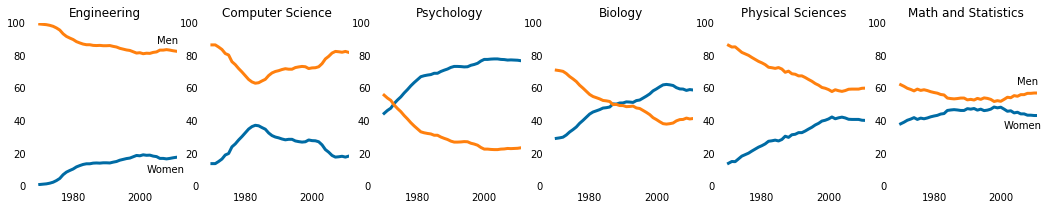

In [2]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

# Color Blind 10 palette
blue = (0/255, 107/255, 164/255)
orange = (255/255, 128/255, 14/255)

# Setup plot 
width, height = 18, 3 # units in inches 
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(width,height))
#axes = [ax for row in axes for ax in row ] # Unpack ax from a list of list of ax

for i, (ax, major) in enumerate(zip(axes, stem_cats)):
    
    # Plot Women and Men data in major category 
    ax.plot(women_degrees['Year'], women_degrees[major], c=blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major], c=orange, linewidth=3)
    
    # Add text "Men" or "Women" to Left/right most chart
    if i == 0:
        # Leftmost chart
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
    elif i+1 == len(axes):
        # Rightmost chart
        ax.text(2005, 62, "Men")
        ax.text(2001, 35, "Women")
    
    # Remove border or spines 
    for key, sp in ax.spines.items():
        sp.set_visible(False)
    
    # Remove ticks 
    ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',         # both major and minor ticks are affected
    bottom=False,         # ticks along the bottom edge are off
    top=False,            # ticks along the top edge are off
    left=False,           # ticks along the left edge are off
    labelbottom=True,    # labels along the bottom edge are off
    labelleft=True)
    
    #Set chart limits
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    
    # Set title
    ax.set_title(major)

#show plot    
plt.show()

## Comparing across all degrees

Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other, in the following way:

```python
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering', 'Computer Science']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
```

Here's what the diagram will look like:

<img src="images/149_comparing_across_categories.png"/>

While in the last mission, the <code><font color="red">stem_cats</font></code> list was ordered by ending gender gap, all three of these lists are ordered in descending order by the percentage of degrees awarded to women. You may have also noticed that while <code><font color="red">stem_cats</font></code> and <code><font color="red">other_cats</font></code> have six degree categories as elements, <code><font color="red">lib_arts_cats</font></code> only has five. You'll need to not only modify the for loop to generate the STEM line charts that we wrote in the last mission but also add two new for loops to generate the line charts for liberal arts degrees and for other degrees.

**Instructions**

- Generate a 6 row by 3 column grid of subplots.
- In the first column:
    - Generate line charts for both male and female percentages for every degree in <code><font color="red">stem_cats</font></code> .
    - Add text annotations for <code><font color="red">"Women"</font></code> and <code><font color="red">"Men"</font></code> in the topmost and bottommost plots.
- In the second column:
    - Generate line charts for both male and female percentages for every degree in <code><font color="red">lib_arts_cats</font></code> .
    - Add text annotations for <code><font color="red">"Women"</font></code> and <code><font color="red">"Men"</font></code> for only the topmost plot (since the lines overlap at the end in the bottommost plot).
- In the third column:
   - Generate line charts for both male and female percentages for every degree in<code><font color="red">other_cats</font></code>.
   - Add text annotations for <code><font color="red">"Women"</font></code> and <code><font color="red">"Men"</font></code> in the topmost and bottommost plots.

In [3]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# Length of cats are 6, 5, 6
print("Length of various cats:", len(stem_cats), len(lib_arts_cats), len(other_cats))

# We are going to extend lib_arts_cats to length of 6 
lib_arts_cats.extend([""])
print("Each tuple represent each rows:", list(zip(stem_cats, lib_arts_cats, other_cats)))

Length of various cats: 6 5 6
Each tuple represent each rows: [('Psychology', 'Foreign Languages', 'Health Professions'), ('Biology', 'English', 'Public Administration'), ('Math and Statistics', 'Communications and Journalism', 'Education'), ('Physical Sciences', 'Art and Performance', 'Agriculture'), ('Computer Science', 'Social Sciences and History', 'Business'), ('Engineering', '', 'Architecture')]


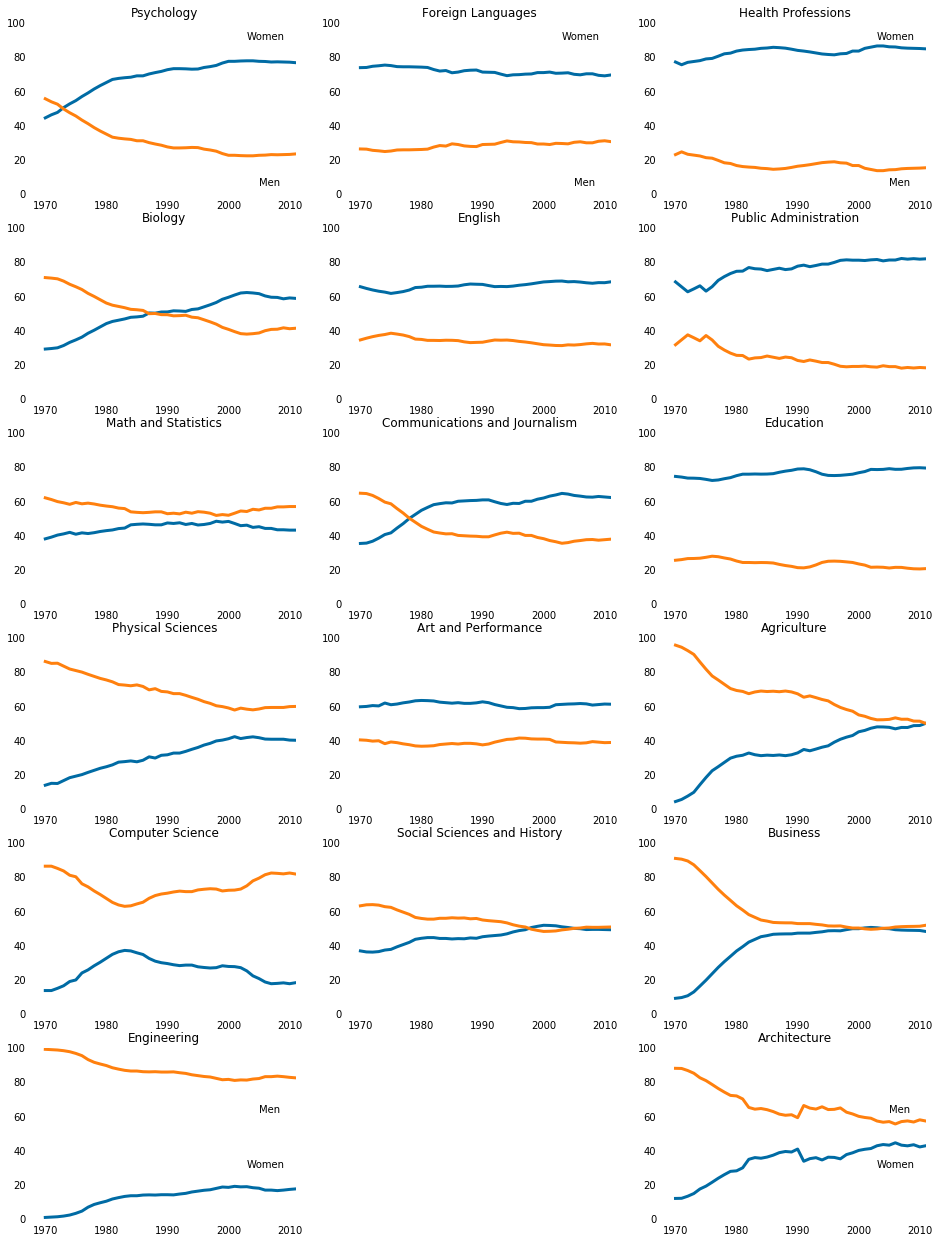

In [4]:
# Color Blind 10 palette
blue = (0/255, 107/255, 164/255)
orange = (255/255, 128/255, 14/255)

# Note: axes is a list of list ax, [[row1: ax, ax, ax], .....[row 6: ax, ax, ax]]
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,22))

for i, (ax, *major) in enumerate(zip(axes, stem_cats, lib_arts_cats, other_cats)):

    for t in range(3):
        # Plot for a given major 
        if major[t] != "":
            
            ax[t].plot(women_degrees["Year"], women_degrees[major[t]], c=blue, linewidth=3)
            ax[t].plot(women_degrees["Year"], 100-women_degrees[major[t]], c=orange, linewidth=3)
            
            ax[t].set_xlim(1968,2011)
            ax[t].set_ylim(0,100)
            ax[t].set_title(major[t])
            
            # Add text "Men" or "Women" to top/bottom most chart
            if i == 0:
                # Top most chart 
                ax[t].text(2003, 90, "Women")
                ax[t].text(2005, 5, "Men")
            elif i+1 == len(axes):
                # Bottom most chart
                ax[t].text(2003, 30, "Women")
                ax[t].text(2005, 62, "Men")
        else:
            ax[t].tick_params(labelbottom=False, labelright=False, labelleft=False, labeltop=False)     
        # Remove border or spines        
        for key, sp in ax[t].spines.items():
            sp.set_visible(False)
        
        # Remove ticks 
        ax[t].tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

## Hiding x-axis labels
With seventeen line charts in one diagram, the non-data elements quickly clutter the field of view. The most immediate issue that sticks out is the titles of some line charts overlapping with the x-axis labels for the line chart above it. If we remove the titles for each line chart, the viewer won't know what degree each line chart refers to. Let's instead remove the x-axis labels for every line chart in a column except for the bottom most one. We can accomplish this by modifying the call to <code><font color="red">Axes.tick_params()</font></code> and setting <code><font color="red">labelbottom</font></code> to <code><font color="red">False</font></code>:
```python
ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
```

This will disable the x-axis labels for all of the line charts. You can then enable the x-axis labels for the bottommost line charts in each column:
```python
ax.tick_params(labelbottom=True)
```

**Instructions**
- Disable the x-axis labels for all line charts except the bottommost line charts in each column.
- Click here to see what the diagram should look like.


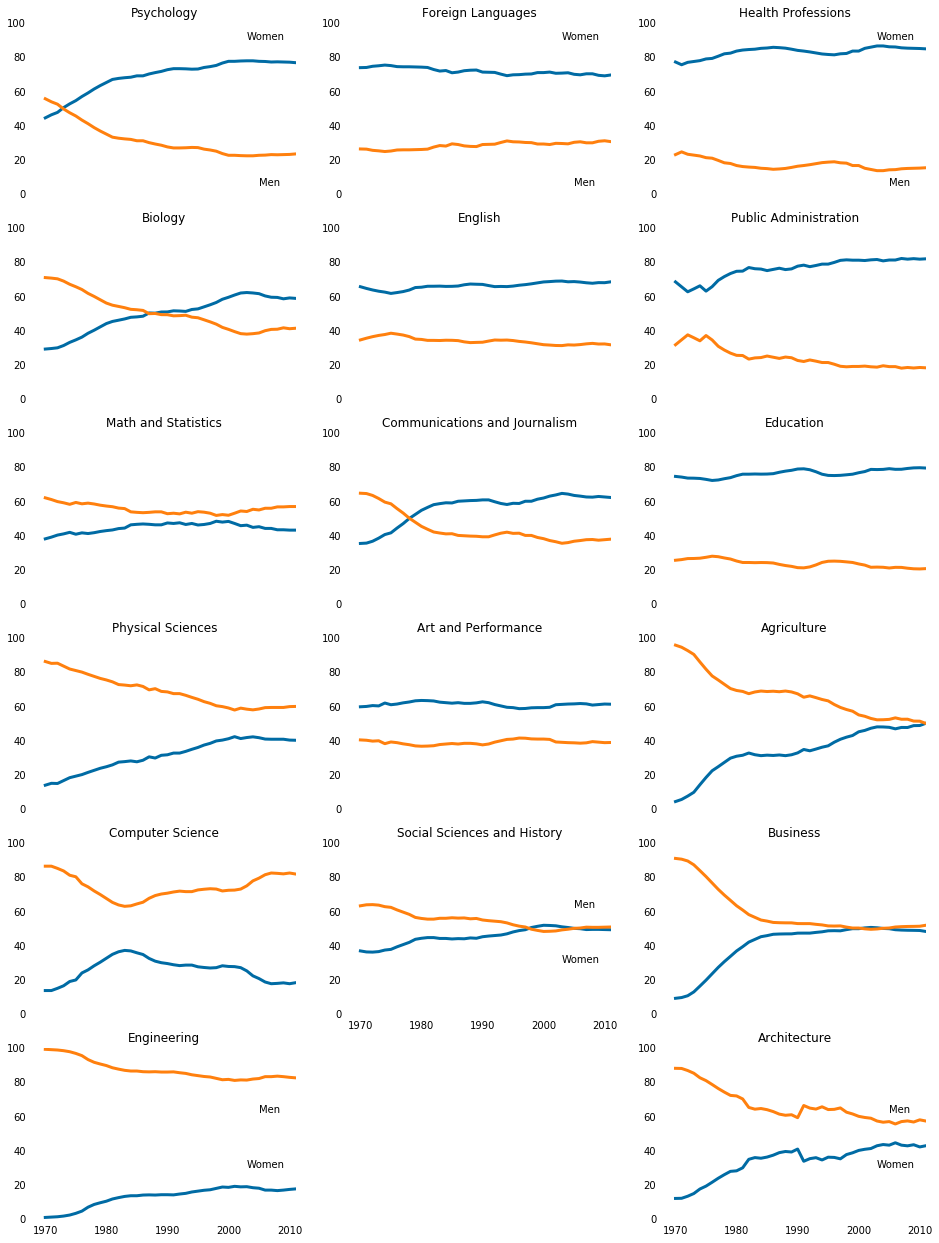

In [5]:
# Color Blind 10 palette
blue = (0/255, 107/255, 164/255)
orange = (255/255, 128/255, 14/255)

# Note: axes is a list of list ax, [[row1: ax, ax, ax], .....[row 6: ax, ax, ax]]
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,22))

for i, (ax, *major) in enumerate(zip(axes, stem_cats, lib_arts_cats, other_cats)):

    for t in range(3):
        # Plot for a given major 
        if major[t] != "":
            
            ax[t].plot(women_degrees["Year"], women_degrees[major[t]], c=blue, linewidth=3)
            ax[t].plot(women_degrees["Year"], 100-women_degrees[major[t]], c=orange, linewidth=3)
            
            ax[t].set_xlim(1968, 2011)
            ax[t].set_ylim(0, 100)
            ax[t].set_title(major[t])
            
            # Add text "Men" or "Women" to top/bottom most chart
            l = len(axes)
            if (t==1 and i+2 == l) or i+1 == l:
                # Bottom most chart
                ax[t].text(2003, 30, "Women")
                ax[t].text(2005, 62, "Men")
                ax[t].tick_params(labelbottom=True)
            elif i == 0:
                # Top most chart 
                ax[t].text(2003, 90, "Women")
                ax[t].text(2005, 5, "Men")
                ax[t].tick_params(labelbottom=False)
            elif i > 0 and i+1 != l:
                ax[t].tick_params(labelbottom=False)
                
        else:
            ax[t].tick_params(labelbottom=False, labelright=False, labelleft=False, labeltop=False)
                
        # Remove border or spines        
        for key, sp in ax[t].spines.items():
            sp.set_visible(False)
        
        # Remove ticks 
        ax[t].tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

## Setting y-axis labels
Removing the x-axis labels for all but the bottommost plots solved the issue we noticed with the overlapping text. In addition, the plots are cleaner and more readable. The trade-off we made is that it's now more difficult for the viewer to discern approximately which years some interesting changes in trends may have happened. This is acceptable because we're primarily interested in enabling the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how has that changed over time.

In the vein of reducing cluttering, let's also simplify the y-axis labels. Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (<code><font color="red">0</font></code> and <code><font color="red">100</font></code>), we can keep some of the benefits of having the y-axis labels to begin with.

We can use the [Axes.set_yticks()](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_yticks) method to specify which labels we want displayed. The following code enables just the <code><font color="red">0</font></code> and <code><font color="red">100</font></code> labels to be displayed:
```python
ax.set_yticks([0,100])
```

**Instructions**
- For all plots:
    - Enable just the y-axis labels at <code><font color="red">0</font></code> and <code><font color="red">100</font></code>
- Click [here[(https://s3.amazonaws.com/dq-content/149_setting_y_axis_labels.png) to see what the diagram should look like

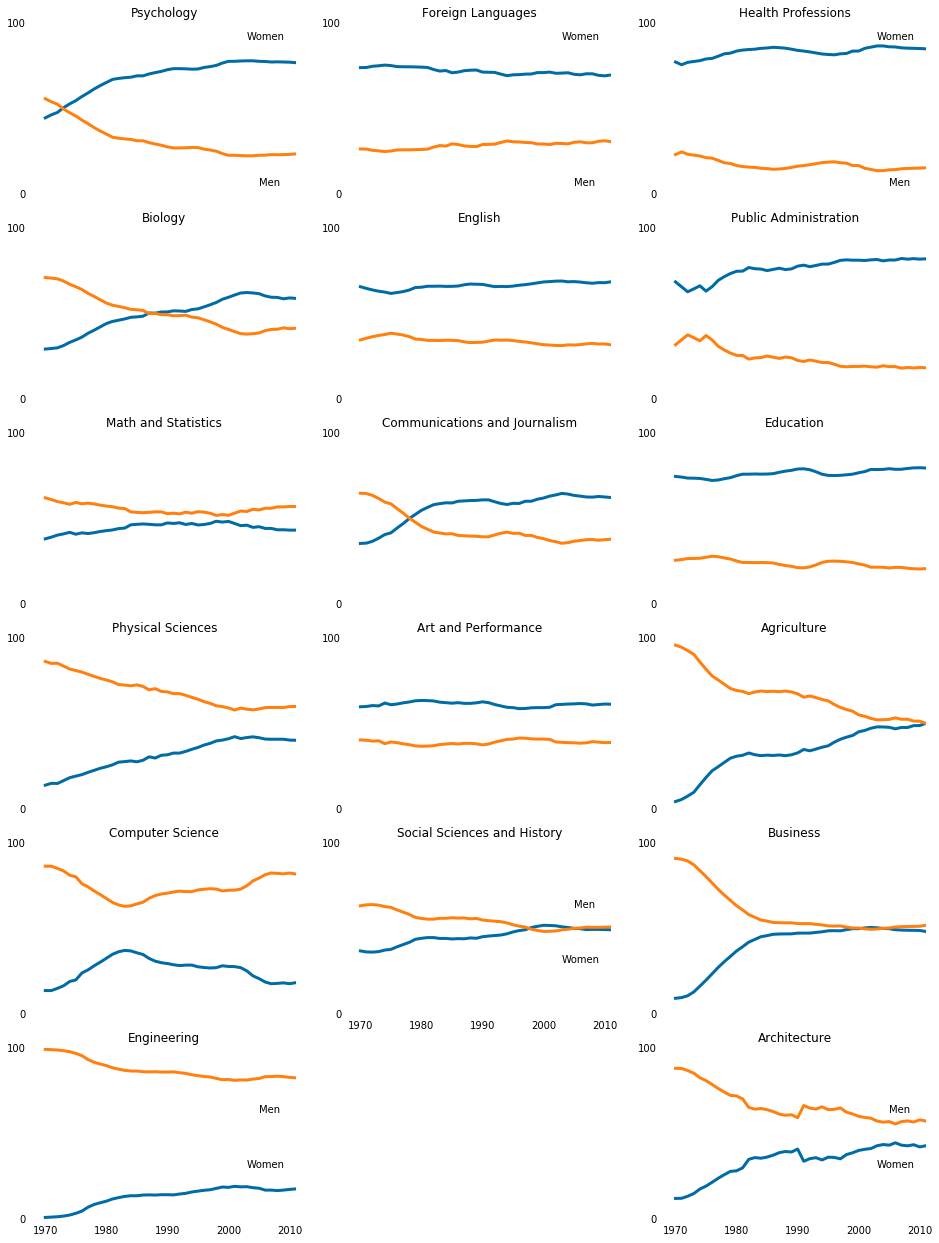

In [6]:
# Color Blind 10 palette
blue = (0/255, 107/255, 164/255)
orange = (255/255, 128/255, 14/255)

# Note: axes is a list of list ax, [[row1: ax, ax, ax], .....[row 6: ax, ax, ax]]
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,22))

for i, (ax, *major) in enumerate(zip(axes, stem_cats, lib_arts_cats, other_cats)):

    for t in range(3):
        # Plot for a given major 
        if major[t] != "":
            
            ax[t].plot(women_degrees["Year"], women_degrees[major[t]], c=blue, linewidth=3)
            ax[t].plot(women_degrees["Year"], 100-women_degrees[major[t]], c=orange, linewidth=3)
            
            ax[t].set_xlim(1968, 2011)
            ax[t].set_ylim(0, 100)
            ax[t].set_title(major[t])
            
            # Set yticks to display only at 0 and 100 
            ax[t].set_yticks([0,100])
        
            # Add text "Men" or "Women" to top/bottom most chart
            l = len(axes)
            if (t==1 and i+2 == l) or i+1 == l:
                # Bottom most chart
                ax[t].text(2003, 30, "Women")
                ax[t].text(2005, 62, "Men")
                ax[t].tick_params(labelbottom=True)
            elif i == 0:
                # Top most chart 
                ax[t].text(2003, 90, "Women")
                ax[t].text(2005, 5, "Men")
                ax[t].tick_params(labelbottom=False)
            elif i > 0 and i+1 != l:
                ax[t].tick_params(labelbottom=False)
        else:
            ax[t].tick_params(labelbottom=False, labelright=False, labelleft=False, labeltop=False)
                
        # Remove border or spines        
        for key, sp in ax[t].spines.items():
            sp.set_visible(False)
        
        # Remove ticks 
        ax[t].tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

## Adding a horizontal line

While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label <code><font color="red">50</font></code> would have been.

We can generate a horizontal line across an entire subplot using the [Axes.axhline() method](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.axhline). The only required parameter is the y-axis location for the start of the line:
```python
ax.axhline(50)
```

Let's use the next color in the [Color Blind 10 palette](http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html) for this horizontal line, which has an RGB value of (171, 171, 171). Because we don't want this line to clutter the viewing experience, let's increase the transparency of the line. We can set the color using the <code><font color="red">c</font></code> parameter and the transparency using the <code><font color="red">alpha</font></code> parameter. The value passed in to the <code><font color="red">alpha</font></code> parameter must range between <code><font color="red">0</font></code> and <code><font color="red">1</font></code>:
```python
ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
```

**Instructions**
- For all plots:
    - Generate a horizontal line with the following properties:
        - Starts at the y-axis position <code><font color="red">50</font></code>
        - Set to the third color (light gray) in the Color Blind 10 palette
        - Has a transparency of <code><font color="red">0.3</font></code>
- Click [here](https://s3.amazonaws.com/dq-content/149_adding_horizontal_lines.png) to see what the diagram should look like.



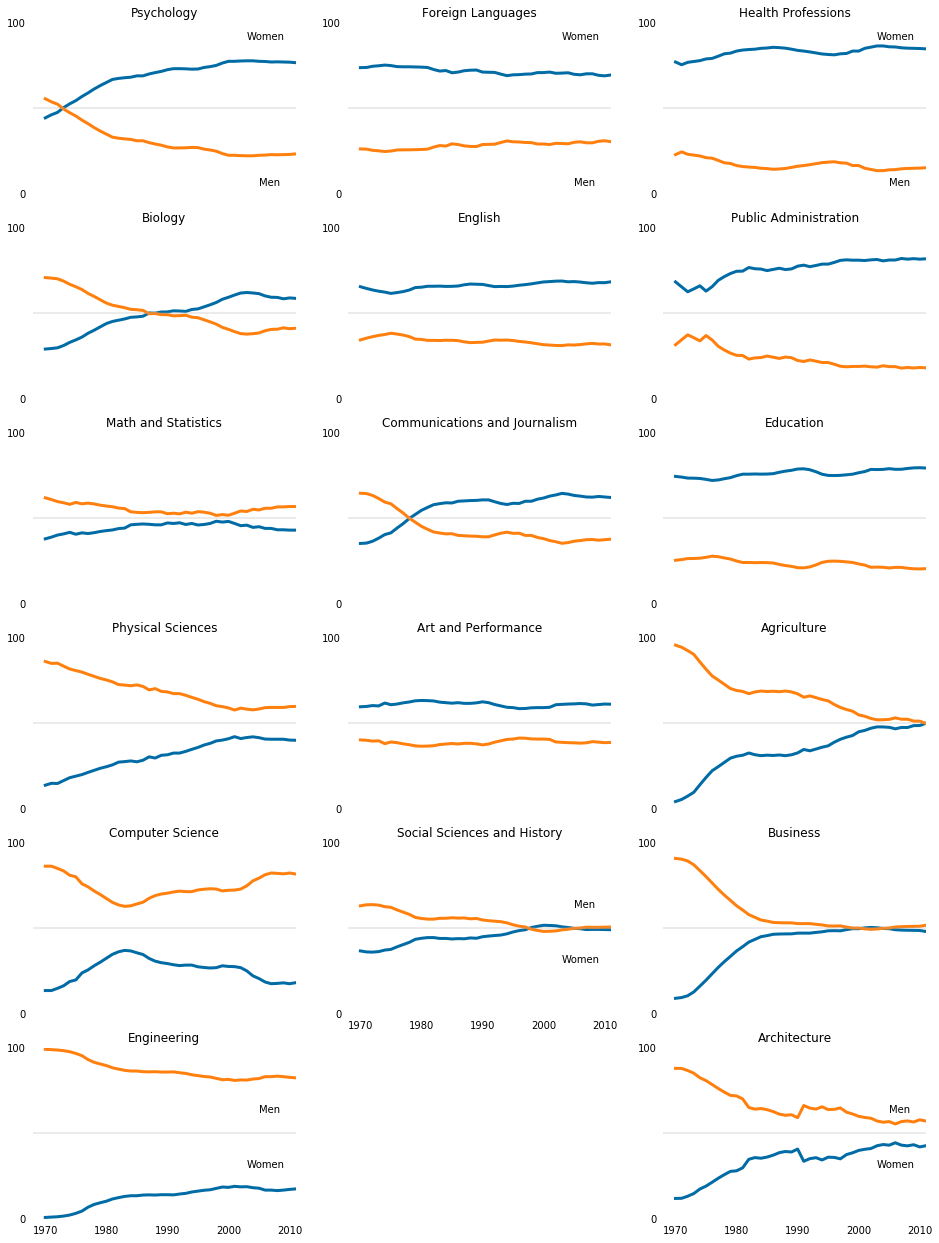

In [7]:
# Color Blind 10 palette
blue = (0/255, 107/255, 164/255)
orange = (255/255, 128/255, 14/255)

# Note: axes is a list of list ax, [[row1: ax, ax, ax], .....[row 6: ax, ax, ax]]
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,22))

for i, (ax, *major) in enumerate(zip(axes, stem_cats, lib_arts_cats, other_cats)):

    for t in range(3):
        # Plot for a given major 
        if major[t] != "":
            
            ax[t].plot(women_degrees["Year"], women_degrees[major[t]], c=blue, linewidth=3)
            ax[t].plot(women_degrees["Year"], 100-women_degrees[major[t]], c=orange, linewidth=3)
            
            ax[t].set_xlim(1968, 2011)
            ax[t].set_ylim(0, 100)
            ax[t].set_title(major[t])
            
            # Set yticks to display only at 0 and 100 
            ax[t].set_yticks([0,100])
            
            # Add y-axis horizontal line at position 50
            # (171/255, 171/255, 171/255) => color based on Color Blind 10 paletee
            # transparency using alpha
            ax[t].axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
            
            # Add text "Men" or "Women" to top/bottom most chart
            l = len(axes)
            if (t==1 and i+2 == l) or i+1 == l:
                # Bottom most chart
                ax[t].text(2003, 30, "Women")
                ax[t].text(2005, 62, "Men")
                ax[t].tick_params(labelbottom=True)
            elif i == 0:
                # Top most chart 
                ax[t].text(2003, 90, "Women")
                ax[t].text(2005, 5, "Men")
                ax[t].tick_params(labelbottom=False)
            elif i > 0 and i+1 != l:
                ax[t].tick_params(labelbottom=False)
        else:
            ax[t].tick_params(labelbottom=False, labelright=False, labelleft=False, labeltop=False)
                
        # Remove border or spines        
        for key, sp in ax[t].spines.items():
            sp.set_visible(False)
        
        # Remove ticks 
        ax[t].tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

## Exporting to a file

If you recall, matplotlib can be used many different ways. It can be used within a Jupyter Notebook interface (like this one), from the command line, or in an integrated development environment. Many of these ways of using matplotlib vary in workflow and handle the rendering of images differently as well. To help support these different use cases, matplotlib can target different outputs or **backends**. If you import matplotlib and run <code><font color="red">matplotlib.get_backend()</font></code>, you'll see the specific backend you're currently using.

With the current backend we're using, we can use [Figure.savefig()](https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.savefig) or [pyplot.savefig()](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig) to export all of the plots contained in the figure as a single image file. Note that these have to be called before we display the figure using <code><font color="red">pyplot.show()</font></code>.:
```python
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.savefig('biology_degrees.png')
```
In the above code, we saved a line chart as a PNG file. You can read about the different popular file types for images [here](https://www.sitepoint.com/gif-png-jpg-which-one-to-use/). The image will be exported into the same folder that your Jupyter Notebook server is running. You can click on the **Jupyter** logo to navigate the file system and find this image:

[Jupyter Logo](https://s3.amazonaws.com/dq-content/jupyter_logo.png)

Exporting plots we create using matplotlib allows us to use them in Word documents, Powerpoint presentations, and even in emails.

**Instructions**
- Export the figure containing all of the line charts to <code><font color="red">"gender_degrees.png"</font></code>.

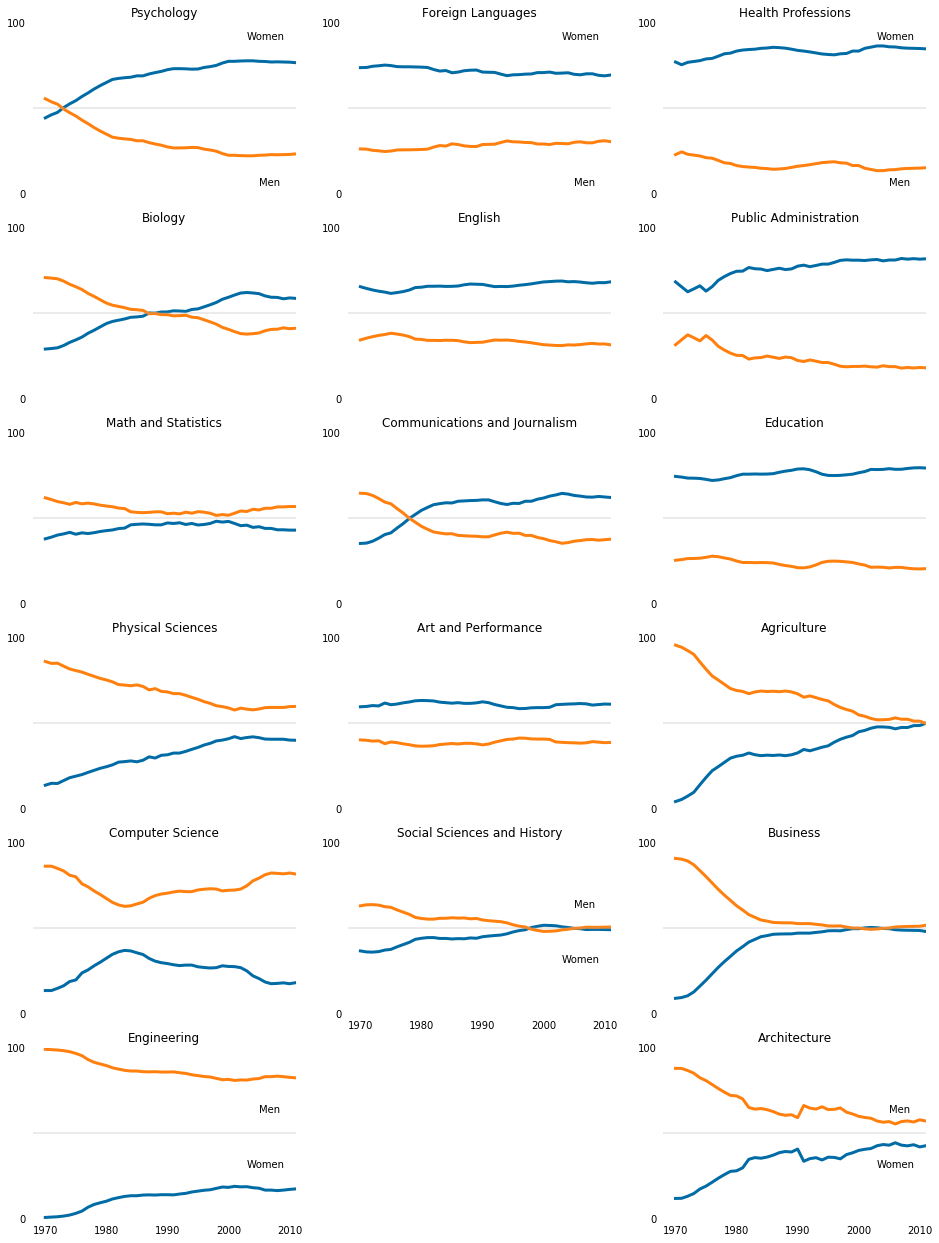

In [8]:
# Color Blind 10 palette
blue = (0/255, 107/255, 164/255)
orange = (255/255, 128/255, 14/255)

# Note: axes is a list of list ax, [[row1: ax, ax, ax], .....[row 6: ax, ax, ax]]
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,22))

for i, (ax, *major) in enumerate(zip(axes, stem_cats, lib_arts_cats, other_cats)):

    for t in range(3):
        # Plot for a given major 
        if major[t] != "":
            
            ax[t].plot(women_degrees["Year"], women_degrees[major[t]], c=blue, linewidth=3)
            ax[t].plot(women_degrees["Year"], 100-women_degrees[major[t]], c=orange, linewidth=3)
            
            ax[t].set_xlim(1968, 2011)
            ax[t].set_ylim(0, 100)
            ax[t].set_title(major[t])
            
            # Set yticks to display only at 0 and 100 
            ax[t].set_yticks([0,100])
            
            # Add y-axis horizontal line at position 50
            # (171/255, 171/255, 171/255) => color based on Color Blind 10 paletee
            # transparency using alpha
            ax[t].axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
            
            # Add text "Men" or "Women" to top/bottom most chart
            l = len(axes)
            if (t==1 and i+2 == l) or i+1 == l:
                # Bottom most chart
                ax[t].text(2003, 30, "Women")
                ax[t].text(2005, 62, "Men")
                ax[t].tick_params(labelbottom=True)
            elif i == 0:
                # Top most chart 
                ax[t].text(2003, 90, "Women")
                ax[t].text(2005, 5, "Men")
                ax[t].tick_params(labelbottom=False)
            elif i > 0 and i+1 != l:
                ax[t].tick_params(labelbottom=False)
        else:
            ax[t].tick_params(labelbottom=False, labelright=False, labelleft=False, labeltop=False)
                
        # Remove border or spines        
        for key, sp in ax[t].spines.items():
            sp.set_visible(False)
        
        # Remove ticks 
        ax[t].tick_params(bottom=False, top=False, left=False, right=False)

# Export file before calling pyplot.show()
fig.savefig("gender_degrees.png")
plt.show()